In [155]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelBinarizer



pd.set_option("display.precision", 2)

input_table = '../../Data/Processed/USA_housing/housing.parquet'

test_var = 'price'


# Carregar dados 

In [156]:
data = pd.read_parquet(input_table)
print('data shape:', data.shape)
print('data columns:', data.columns.tolist())
data.head()

data shape: (5000, 6)
data columns: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.46,5.68,7.01,4.09,23086.80,1.06e+06
1,79248.64,6.00,6.73,3.09,40173.07,1.51e+06
2,61287.07,5.87,8.51,5.13,36882.16,1.06e+06
3,63345.24,7.19,5.59,3.26,34310.24,1.26e+06
4,59982.20,5.04,7.84,4.23,26354.11,6.31e+05


In [157]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5.00e+03
mean,68583.11,5.98,6.99,3.98,36163.52,1.23e+06
std,10657.99,0.99,1.01,1.23,9925.65,3.53e+05
min,17796.63,2.64,3.24,2.00,172.61,1.59e+04
25%,61480.56,5.32,6.30,3.14,29403.93,9.98e+05
50%,68804.29,5.97,7.00,4.05,36199.41,1.23e+06
75%,75783.34,6.65,7.67,4.49,42861.29,1.47e+06
max,107701.75,9.52,10.76,6.50,69621.71,2.47e+06


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [159]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.46,5.68,7.01,4.09,23086.80,1.06e+06
1,79248.64,6.00,6.73,3.09,40173.07,1.51e+06
2,61287.07,5.87,8.51,5.13,36882.16,1.06e+06
3,63345.24,7.19,5.59,3.26,34310.24,1.26e+06
4,59982.20,5.04,7.84,4.23,26354.11,6.31e+05


## Treinando o modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão! Primeiro, precisamos dividir nossos dados em uma matriz X que contém os recursos para treinar e uma matriz y com a variável de destino, neste caso a coluna Preço. Jogaremos fora a coluna Endereço, pois ela possui apenas informações de texto que o modelo de regressão linear não pode usar.

### arrays X e y

In [160]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Criando e treinando o modelo

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
lm = LinearRegression()

In [165]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Avaliação do modelo

Vamos avaliar o modelo verificando seus coeficientes e como podemos interpretá-los.

In [166]:
# imprimindo o coeficiente linear
print(lm.intercept_)

-2640159.796851911


In [167]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
Avg. Area Income,21.53
Avg. Area House Age,164883.28
Avg. Area Number of Rooms,122368.68
Avg. Area Number of Bedrooms,2233.80
Area Population,15.15


Interpretando os coeficientes:

- Mantendo todas as features fixas, aumento de uma unidade em **Avg. Area Income** está associada com **aumento de \$21.53 **.
- Mantendo todas as features fixas, aumento de uma unidade em **Avg. Area House Age** está associada com **aumento de \$164883.28 **.
- Mantendo todas as features fixas, aumento de uma unidade em **Avg. Area Number of Rooms** está associada com **aumento de \$122368.68 **.
- Mantendo todas as features fixas, aumento de uma unidade em **Avg. Area Number of Bedrooms** está associada com **aumento de \$2233.80 **.
- Mantendo todas as features fixas, aumento de uma unidade em **Area Population** está associada com **aumento de \$15.15 **.



## Predições do modelo



In [168]:
predictions = lm.predict(X_test)

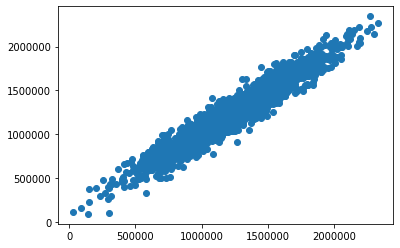

In [169]:
plt.scatter(y_test,predictions)

**Histograma residual**

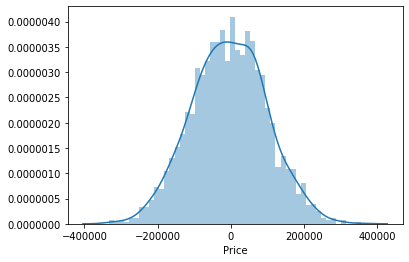

In [170]:
sns.distplot((y_test-predictions),bins=50);

Text(0, 0.5, 'Preço das casas')

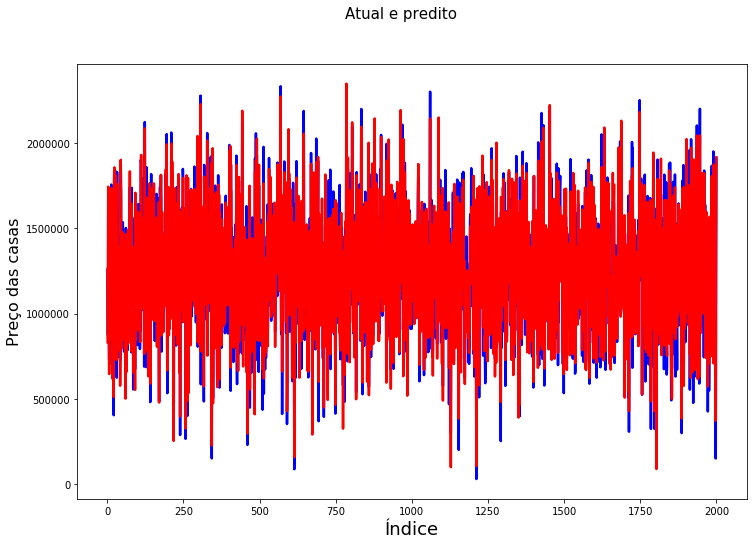

In [171]:
# Valor predito e valor atual
c = [i for i in range(1,2001,1)] # gerando índice 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotando valor atual
plt.plot(c,predictions, color="red",  linewidth=2.5, linestyle="-") #Plotando valor predito
fig.suptitle('Atual e predito', fontsize=15)              # Plot heading 
plt.xlabel('Índice', fontsize=18)                               # X-label
plt.ylabel('Preço das casas', fontsize=16)                       # Y-label

In [172]:
from sklearn import metrics

In [173]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153
